# Assignment: Ionosphere Data Problem

### Dataset Description: 

This radar data was collected by a system in Goose Bay, Labrador. This system consists of a phased array of 16 high-frequency antennas with a total transmitted power on the order of 6.4 kilowatts. See the paper for more details. The targets were free electrons in the ionosphere. "Good" radar returns are those showing evidence of some type of structure in the ionosphere. "Bad" returns are those that do not; their signals pass through the ionosphere.

Received signals were processed using an autocorrelation function whose arguments are the time of a pulse and the pulse number. There were 17 pulse numbers for the Goose Bay system. Instances in this databse are described by 2 attributes per pulse number, corresponding to the complex values returned by the function resulting from the complex electromagnetic signal.

### Attribute Information:

- All 34 are continuous
- The 35th attribute is either "good" or "bad" according to the definition summarized above. This is a binary classification task.

 <br><br>

<table border="1"  cellpadding="6">
	<tbody>
        <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Data Set Characteristics:&nbsp;&nbsp;</b></p></td>
		<td><p class="normal">Multivariate</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Instances:</b></p></td>
		<td><p class="normal">351</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Area:</b></p></td>
		<td><p class="normal">Physical</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">
    <tbody>
        <tr>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Attribute Characteristics:</b></p></td>
            <td><p class="normal">Integer,Real</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Number of Attributes:</b></p></td>
            <td><p class="normal">34</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Date Donated</b></p></td>
            <td><p class="normal">N/A</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">	
    <tbody>
    <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Associated Tasks:</b></p></td>
		<td><p class="normal">Classification</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Missing Values?</b></p></td>
		<td><p class="normal">N/A</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Web Hits:</b></p></td>
		<td><p class="normal">N/A</p></td>
	</tr>
    </tbody>
    </table>

### WORKFLOW :
- Load Data .

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [92]:
pd.__version__

'1.1.3'

In [93]:
np.__version__

'1.19.2'

# Load Data:
[Click Here to Download DataSet](https://github.com/ramsha275/ML_Datasets/blob/main/ionosphere_data.csv)

Loading data...

In [53]:
# Load the dataset.
df = pd.read_csv('ionosphere_data.csv', delimiter=',')

In [54]:
# Find the shape of the dataset 
df.shape

(351, 35)

It's clear from the shape of the data that dataset is not a huge one. Only 351 records are available with 34 features/columns.

In [55]:
df.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [56]:
for feature in df:
    print(feature)
    print(len(df[feature].unique()))

feature1
2
feature2
1
feature3
219
feature4
269
feature5
204
feature6
259
feature7
231
feature8
260
feature9
244
feature10
267
feature11
246
feature12
269
feature13
238
feature14
266
feature15
234
feature16
270
feature17
254
feature18
280
feature19
254
feature20
266
feature21
248
feature22
265
feature23
248
feature24
264
feature25
256
feature26
273
feature27
256
feature28
281
feature29
244
feature30
266
feature31
243
feature32
263
feature33
245
feature34
263
label
2


In [57]:
df['feature2'].unique()

array([0], dtype=int64)

In [58]:
df.drop(df.columns[1], inplace=True, axis=1)

In [59]:
df.head()

,feature1,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,...,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [60]:
df.ndim

2

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 34 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature1   351 non-null    int64  
 1   feature3   351 non-null    float64
 2   feature4   351 non-null    float64
 3   feature5   351 non-null    float64
 4   feature6   351 non-null    float64
 5   feature7   351 non-null    float64
 6   feature8   351 non-null    float64
 7   feature9   351 non-null    float64
 8   feature10  351 non-null    float64
 9   feature11  351 non-null    float64
 10  feature12  351 non-null    float64
 11  feature13  351 non-null    float64
 12  feature14  351 non-null    float64
 13  feature15  351 non-null    float64
 14  feature16  351 non-null    float64
 15  feature17  351 non-null    float64
 16  feature18  351 non-null    float64
 17  feature19  351 non-null    float64
 18  feature20  351 non-null    float64
 19  feature21  351 non-null    float64
 20  feature22 

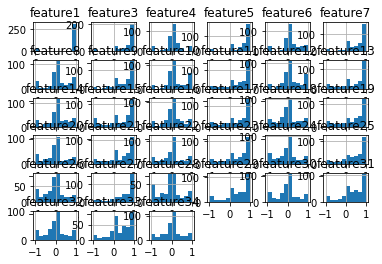

In [63]:
'''for feature in df:
    print(feature)
    df[feature].hist()
    plt.show()'''

df.hist()
plt.show()

In [64]:
# Check summary statistics
df.describe()

,feature1,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,...,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34
count,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,...,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000
mean,0.891738,0.641342,0.044372,0.601068,0.115889,0.550095,0.119360,0.511848,0.181345,0.476183,...,0.396135,-0.071187,0.541641,-0.069538,0.378445,-0.027907,0.352514,-0.003794,0.349364,0.014480
std,0.311155,0.497708,0.441435,0.519862,0.460810,0.492654,0.520750,0.507066,0.483851,0.563496,...,0.578451,0.508495,0.516205,0.550025,0.575886,0.507974,0.571483,0.513574,0.522663,0.468337
min,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,0.472135,-0.064735,0.412660,-0.024795,0.211310,-0.054840,0.087110,-0.048075,0.021120,...,0.000000,-0.332390,0.286435,-0.443165,0.000000,-0.236885,0.000000,-0.242595,0.000000,-0.165350
50%,1.000000,0.871110,0.016310,0.809200,0.022800,0.728730,0.014710,0.684210,0.018290,0.667980,...,0.553890,-0.015050,0.708240,-0.017690,0.496640,0.000000,0.442770,0.000000,0.409560,0.000000
75%,1.000000,1.000000,0.194185,1.000000,0.334655,0.969240,0.445675,0.953240,0.534195,0.957895,...,0.905240,0.156765,0.999945,0.153535,0.883465,0.154075,0.857620,0.200120,0.813765,0.171660
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- Check Missing Values ( If Exist ; Fill each record with mean of its feature ) or any usless column.

In [65]:
# Find missing values
df.isnull().sum()

feature1     0
feature3     0
feature4     0
feature5     0
feature6     0
feature7     0
feature8     0
feature9     0
feature10    0
feature11    0
feature12    0
feature13    0
feature14    0
feature15    0
feature16    0
feature17    0
feature18    0
feature19    0
feature20    0
feature21    0
feature22    0
feature23    0
feature24    0
feature25    0
feature26    0
feature27    0
feature28    0
feature29    0
feature30    0
feature31    0
feature32    0
feature33    0
feature34    0
label        0
dtype: int64

In [66]:
df['label'] = [1 if lbl == 'g' else 0 for lbl in df['label']]

In [67]:
df.head(2)

,feature1,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,...,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.0,0.03760,0.85243,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,1
1,1,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.0,-0.04549,0.50874,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,0


- Standardized the Input Variables. **Hint**: Centeralized the data

In [68]:
# Normalize the data
# normalized_df = (df-df.mean(axis=0))/df.std(axis=0)

- Encode labels.

- Shuffle the data if needed.
- Split into 60 and 40 ratio.

In [74]:
# Now sample the dataframe
train_data = df.sample(frac=.6, random_state=125)
test_data = df.drop(train_set.index)

In [75]:
train_data.shape

(211, 34)

In [76]:
test_data.shape

(140, 34)

In [77]:
df.shape

(351, 34)

In [78]:
train_set = train_data.iloc[:,:-1]
train_label = train_data.iloc[:,-1]

In [79]:
test_set = test_data.iloc[:,:-1]
test_label = test_data.iloc[:,-1]

In [80]:
train_set.shape

(211, 33)

In [81]:
train_label.shape

(211,)

In [82]:
test_set.shape

(140, 33)

In [83]:
test_label.shape

(140,)

In [84]:
train_label.sum()

140

In [89]:
len(train_label)

211

In [87]:
train_label.sum()/len(train_label)

0.6635071090047393

### Data Preprocessing

In [95]:
type(train_set)

pandas.core.frame.DataFrame

In [96]:
type(train_label)

pandas.core.series.Series

In [97]:
type(test_label)

pandas.core.series.Series

In [98]:
type(test_label)

pandas.core.series.Series

In [127]:
train_set = train_set.to_numpy()

In [128]:
type(train_set)

numpy.ndarray

In [129]:
train_set.shape

(211, 33)

In [130]:
train_label = train_label.to_numpy()

In [131]:
type(train_label)

numpy.ndarray

In [132]:
train_label.shape

(211,)

In [133]:
input_dim = train_set.shape[1]

In [134]:
#train_set = np.array(train_set.as_matrix())
#train_label = np.array(pd.DataFrame(train_label).as_matrix())

### Model Architecture

- Model : 1 hidden layers including 16 unit.

In [283]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define model
model = Sequential()
model.add(Dense(34, activation='relu', input_dim=input_dim))
model.add(Dropout(0.1))
model.add(Dense(17, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(1,  activation='sigmoid'))

In [284]:
model.summary()

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_82 (Dense)             (None, 34)                1156      
_________________________________________________________________
dropout_47 (Dropout)         (None, 34)                0         
_________________________________________________________________
dense_83 (Dense)             (None, 17)                595       
_________________________________________________________________
dropout_48 (Dropout)         (None, 17)                0         
_________________________________________________________________
dense_84 (Dense)             (None, 1)                 18        
Total params: 1,769
Trainable params: 1,769
Non-trainable params: 0
_________________________________________________________________


- Compilation Step (Note : Its a Binary problem , select loss , metrics according to it)

In [285]:
from tensorflow.keras import optimizers

model.compile(optimizer='RMSprop', loss='binary_crossentropy', metrics=['accuracy'])

- Train the Model with Epochs (100).

In [286]:
history = model.fit(train_set, train_label, validation_split=0.33, epochs=50, batch_size = 32)

Epoch 1/50
5/5 [==============================] - 1s 49ms/step - loss: 0.6937 - accuracy: 0.5041 - val_loss: 0.6340 - val_accuracy: 0.8571
Epoch 2/50
5/5 [==============================] - 0s 12ms/step - loss: 0.6303 - accuracy: 0.7962 - val_loss: 0.5915 - val_accuracy: 0.8714
Epoch 3/50
5/5 [==============================] - 0s 13ms/step - loss: 0.5941 - accuracy: 0.7917 - val_loss: 0.5564 - val_accuracy: 0.8714
Epoch 4/50
5/5 [==============================] - 0s 12ms/step - loss: 0.5654 - accuracy: 0.8414 - val_loss: 0.5279 - val_accuracy: 0.8857
Epoch 5/50
5/5 [==============================] - 0s 14ms/step - loss: 0.5547 - accuracy: 0.8136 - val_loss: 0.5035 - val_accuracy: 0.8857
Epoch 6/50
5/5 [==============================] - 0s 14ms/step - loss: 0.5324 - accuracy: 0.7671 - val_loss: 0.4837 - val_accuracy: 0.8857
Epoch 7/50
5/5 [==============================] - 0s 14ms/step - loss: 0.4868 - accuracy: 0.8296 - val_loss: 0.4657 - val_accuracy: 0.8857
Epoch 8/50
5/5 [===========

In [287]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

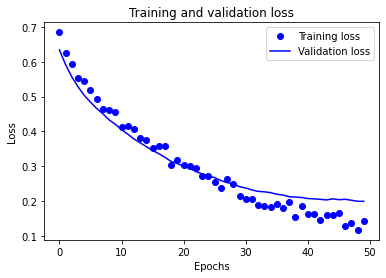

In [288]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(50)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

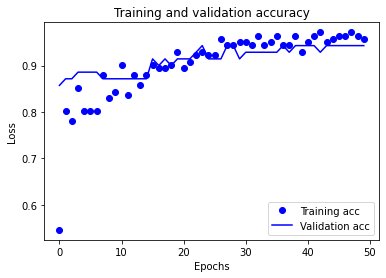

In [289]:
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

- Evaluation Step
- Prediction

In [290]:
score = model.evaluate(test_set, test_label)

5/5 [==============================] - 0s 0s/step - loss: 0.2300 - accuracy: 0.9286


In [291]:
score

[0.23001548647880554, 0.9285714030265808]

- If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .
- Prediction should be > **92%**